In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

# Ignore SQLITE warnings related to Decimal numbers in the Chinook database
import warnings
warnings.filterwarnings('ignore')

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)
connection = engine.connect()

In [6]:
# Query Required Tables in the the Database
# data = engine.execute("SELECT * FROM measurement")
# for record in data:
#     print(record)

In [7]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [8]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
Station
Measurement


sqlalchemy.ext.automap.measurement

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [13]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [16]:
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
Measurement = Base.classes.measurement
stmt=session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date > '2016-09-01').\
    order_by(Measurement.date.desc()).all()
stmt


[(0.0, '2017-08-23'),
 (0.0, '2017-08-23'),
 (0.08, '2017-08-23'),
 (0.45, '2017-08-23'),
 (0.0, '2017-08-22'),
 (0.0, '2017-08-22'),
 (0.5, '2017-08-22'),
 (0.0, '2017-08-21'),
 (0.02, '2017-08-21'),
 (None, '2017-08-21'),
 (0.56, '2017-08-21'),
 (0.0, '2017-08-20'),
 (0.01, '2017-08-20'),
 (None, '2017-08-20'),
 (0.0, '2017-08-19'),
 (0.0, '2017-08-19'),
 (None, '2017-08-19'),
 (0.09, '2017-08-19'),
 (0.0, '2017-08-18'),
 (0.0, '2017-08-18'),
 (0.06, '2017-08-18'),
 (None, '2017-08-18'),
 (0.0, '2017-08-17'),
 (0.05, '2017-08-17'),
 (0.01, '2017-08-17'),
 (0.13, '2017-08-17'),
 (0.0, '2017-08-16'),
 (0.07, '2017-08-16'),
 (0.12, '2017-08-16'),
 (0.42, '2017-08-16'),
 (0.02, '2017-08-15'),
 (0.0, '2017-08-15'),
 (0.06, '2017-08-15'),
 (0.32, '2017-08-15'),
 (0.42, '2017-08-15'),
 (0.0, '2017-08-14'),
 (0.01, '2017-08-14'),
 (0.08, '2017-08-14'),
 (0.0, '2017-08-14'),
 (0.22, '2017-08-14'),
 (0.0, '2017-08-13'),
 (None, '2017-08-13'),
 (0.0, '2017-08-13'),
 (0.0, '2017-08-13'),
 (None,

In [18]:
# Load the results into a pandas dataframe. Set the index to the `Measurement.date`
# YOUR CODE HERE
df = pd.DataFrame(stmt, columns=['Measurement.prcp', 'Measurement.date'])
df.set_index('Measurement.date', inplace=True, )
df.head(10)


,Measurement.prcp
Measurement.date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
2017-08-22,0.00
2017-08-22,0.50
2017-08-21,0.00
2017-08-21,0.02


Text(0, 0.5, 'Precipitation')

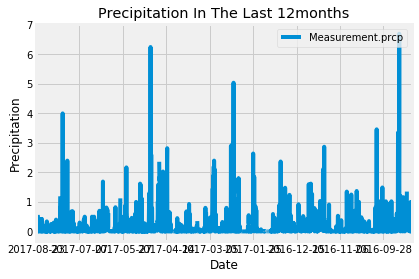

In [19]:
df.plot.line()
plt.legend(loc="upper right")
plt.title("Precipitation In The Last 12months")
plt.xlabel("Date")
plt.ylabel("Precipitation")

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Measurement = pd.read_sql('select * from Measurement', connection)
Measurement.prcp.describe()

count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: prcp, dtype: float64

In [21]:
# Design a query to show how many stations are available in this dataset?
# Create a session
session = Session(engine)
# Total Stations
session.query(func.count(Station.station)).all()


[(9)]

In [22]:
#session.query(Measurement.station).distinct().all()
data = engine.execute("SELECT station, COUNT (station) FROM measurement GROUP BY station ORDER BY 'count' DESC")
for record in data:
    print(record)

('USC00511918', 1979)
('USC00513117', 2709)
('USC00514830', 2202)
('USC00516128', 2612)
('USC00517948', 1372)
('USC00518838', 511)
('USC00519281', 2772)
('USC00519397', 2724)
('USC00519523', 2669)


In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
#session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()

session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()

InvalidRequestError: SQL expression, column, or mapped entity expected - got '0        USC00519397
1        USC00519397
2        USC00519397
3        USC00519397
4        USC00519397
5        USC00519397
6        USC00519397
7        USC00519397
8        USC00519397
9        USC00519397
10       USC00519397
11       USC00519397
12       USC00519397
13       USC00519397
14       USC00519397
15       USC00519397
16       USC00519397
17       USC00519397
18       USC00519397
19       USC00519397
20       USC00519397
21       USC00519397
22       USC00519397
23       USC00519397
24       USC00519397
25       USC00519397
26       USC00519397
27       USC00519397
28       USC00519397
29       USC00519397
            ...     
19520    USC00516128
19521    USC00516128
19522    USC00516128
19523    USC00516128
19524    USC00516128
19525    USC00516128
19526    USC00516128
19527    USC00516128
19528    USC00516128
19529    USC00516128
19530    USC00516128
19531    USC00516128
19532    USC00516128
19533    USC00516128
19534    USC00516128
19535    USC00516128
19536    USC00516128
19537    USC00516128
19538    USC00516128
19539    USC00516128
19540    USC00516128
19541    USC00516128
19542    USC00516128
19543    USC00516128
19544    USC00516128
19545    USC00516128
19546    USC00516128
19547    USC00516128
19548    USC00516128
19549    USC00516128
Name: station, Length: 19550, dtype: object'

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
